<a href="https://colab.research.google.com/github/michel-phylo/CNV_ADERA/blob/main/Adera_MAKARIOUS_BRAIN%2BCNV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!ls

In [ ]:
!pip3 install tensorflow

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [ ]:
import pandas as pd

#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')

first_data_adera

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera["Cancer_type"].unique()

array(['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Esophageal_Adenocarcinoma', 'Renal_Clear_Cell_Carcinoma',
       'Head_and_Neck_Squamous', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Liver_Hepatocellular_Carcinoma',
       'Breast_Invasive_Ductal_Carcinoma', 'Stomach_Adenocarcinoma',
       'Uterine_Corpus_Endometrial_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Adrenocortical_Carcinoma',
       'Glioblastoma_Multiforme', 'Skin_Cutaneous_Melanoma',
       'Brain_Lower_Grade_Glioma'], dtype=object)

In [ ]:
First_data_adera3a= first_data_adera3[first_data_adera3['Cancer_type'] == 'Brain_Lower_Grade_Glioma']
First_data_adera3b= first_data_adera3[first_data_adera3['Cancer_type'] == 'Glioblastoma_Multiforme']

First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b])


In [ ]:
First_data_adera3c

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
1550,CDKN2A,HOMDEL,10.8,9,21967752.0,21995301.0,3,Brain_Lower_Grade_Glioma
1559,CDKN2A-DT,HOMDEL,10.0,9,21966929.0,21967751.0,77,Brain_Lower_Grade_Glioma
1568,CDKN2B,HOMDEL,11.0,9,22002903.0,22009305.0,3,Brain_Lower_Grade_Glioma
1577,CDKN2B-AS1,HOMDEL,11.0,9,21994139.0,22128103.0,77,Brain_Lower_Grade_Glioma
2816,EGFR,AMP,7.6,7,55019017.0,55211628.0,77,Brain_Lower_Grade_Glioma
...,...,...,...,...,...,...,...,...
12335,VOPP1,AMP,22.3,7,55436056.0,55572988.0,3,Glioblastoma_Multiforme
12369,VSTM2A,AMP,22.4,7,54542325.0,54571080.0,77,Glioblastoma_Multiforme
12371,VSTM2A-OT1,AMP,22.4,7,54556970.0,54571726.0,77,Glioblastoma_Multiforme
12801,ZNF479,AMP,7.5,7,57117676.0,57139864.0,3,Glioblastoma_Multiforme


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=First_data_adera3c['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])
Output_net_Adera2.shape
Output_net_Adera2
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
Output_net_Adera3.shape

(113, 1, 1, 2)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)

from random import sample

class_0_indices = np.where(Output_net_Adera3 == 0)[0]
class_1_indices = np.where(Output_net_Adera3 == 1)[0]

num_samples_class_0 = len(class_0_indices)
num_samples_class_1 = len(class_1_indices)

target_size = min(num_samples_class_0, num_samples_class_1)

undersampled_indices = np.concatenate([
    sample(class_0_indices.tolist(), target_size),
    class_1_indices
])

Input_Adera_undersampled = Input_Adera_numpy2[undersampled_indices]
Output_net_Adera_undersampled = Output_net_Adera3[undersampled_indices]




grace_model = tf.keras.Sequential([

# tf.keras.layers.Dense(2, activation='sigmoid'),
 #tf.keras.layers.Dense(2, activation='softmax'),
 tf.keras.layers.Dense(2, activation='softplus')


      ])





optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-2, clipnorm = .08)

grace_model.compile(optimizer=optimizer_Adera, loss='binary_crossentropy', metrics=['accuracy'])
k_adera = grace_model.fit(Input_Adera_undersampled, Output_net_Adera_undersampled, verbose=1, validation_split=0.49, epochs=200, batch_size=10, callbacks=[es_ADERA])
#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=200,batch_size=10, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/200
12/12 [==============================] - 1s 22ms/step - loss: 0.9377 - accuracy: 0.3217 - val_loss: 0.6500 - val_accuracy: 0.3333
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.8000 - val_loss: 0.3909 - val_accuracy: 0.9459
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 0.4247 - accuracy: 0.9130 - val_loss: 0.3444 - val_accuracy: 0.9459
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 0.6060 - accuracy: 0.9130 - val_loss: 0.4591 - val_accuracy: 0.9459
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 0.6945 - accuracy: 0.9130 - val_loss: 0.5434 - val_accuracy: 0.9459
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8292 - accuracy: 0.9130 - val_loss: 0.5320 - val_accuracy: 0.9459
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.9130 - val_loss: 0.5267 - val_accuracy: 0.9459
Epoch 8/200


1/1 [==============================] - 0s 31ms/step - loss: 0.6569 - accuracy: 0.9292


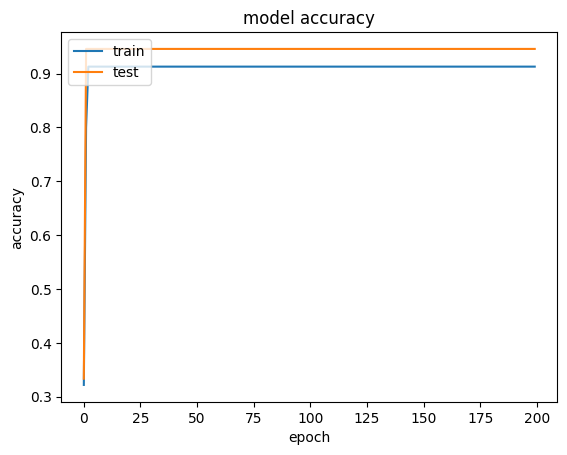

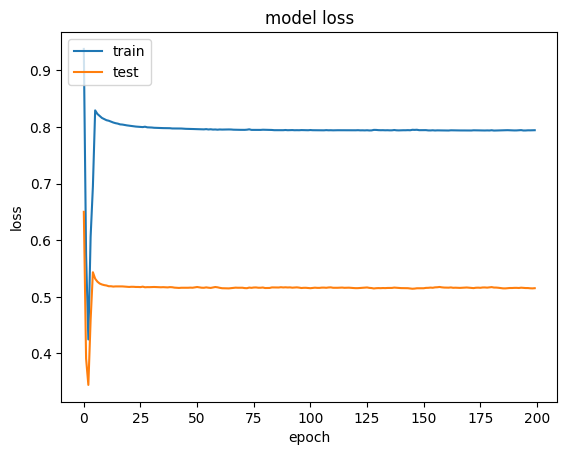

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()


In [ ]:

grace_model.save("adera+90+80b+sigmoid2+Brain")


In [ ]:
adera_47_40_model = tf.keras.saving.load_model("adera+90+80b+sigmoid2+Brain")

In [ ]:
First_data_adera3c["Cancer_type"].unique()
data_adera= {
    "types":First_data_adera3c["Cancer_type"].unique(),
    "values": [0, 1]
}
import random
from keras.utils.np_utils import to_categorical


 # print(adera_test)
#Input_Adera_numpy2[adera_test].shape
#data_adera

threshold = 0.85  # Set the threshold for prediction

num_runs = 3
accuracies = []

for run in range(num_runs):
    adera_test = [random.randint(0, Adera_chromosome4.shape[0]-1) for _ in range(99)]
    correct_predictions = 0
    total_predictions = 0

    for adera_test1 in adera_test:
        test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
        adera_result = adera_47_40_model.predict(test_mac)
        print("adera_result=",adera_result)


        adera_result_thresholded = (adera_result >= threshold).astype(int)
        adera_result5 = np.argmax(adera_result_thresholded)
       # print("adera_result5=",adera_result5)

        if data_adera['types'][adera_result5] == First_data_adera3c['Cancer_type'].iloc[adera_test1]:
            #print("data_adera['types'][adera_result5] =", data_adera['types'][adera_result5])
           # print("data_adera['types'][adera_result5]=",data_adera['types'][adera_result5])
            correct_predictions += 1

        total_predictions += 1

    accuracy = correct_predictions / total_predictions
    accuracies.append(accuracy)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print("Mean accuracy:", mean_accuracy)
print("Standard deviation of accuracy:", std_accuracy)



1/1 [==============================] - 0s 24ms/step
adera_result= [[[[0.13621739 0.8636842 ]]]]
adera_result5= 1
data_adera['types'][adera_result5] = Glioblastoma_Multiforme
data_adera['types'][adera_result5]= Glioblastoma_Multiforme
1/1 [==============================] - 0s 25ms/step
adera_result= [[[[0.1370564 0.8628574]]]]
adera_result5= 1
data_adera['types'][adera_result5] = Glioblastoma_Multiforme
data_adera['types'][adera_result5]= Glioblastoma_Multiforme
1/1 [==============================] - 0s 25ms/step
adera_result= [[[[0.02246535 0.9769166 ]]]]
adera_result5= 1
data_adera['types'][adera_result5] = Glioblastoma_Multiforme
data_adera['types'][adera_result5]= Glioblastoma_Multiforme
1/1 [==============================] - 0s 24ms/step
adera_result= [[[[0.05702516 0.94289577]]]]
adera_result5= 1
data_adera['types'][adera_result5] = Glioblastoma_Multiforme
data_adera['types'][adera_result5]= Glioblastoma_Multiforme
1/1 [==============================] - 0s 23ms/step
adera_result= 

In [ ]:
correct_predictions

3